# **Download earth images (NASA MODIS)**

This function can download an entire history of any NASA image dataset that follow the GIBS RESTful API pattern of calls

**Sample call**: https://gibs.earthdata.nasa.gov/wmts/epsg4326/best/MODIS_Terra_CorrectedReflectance_TrueColor/default/2012-07-09/250m/6/13/36.jpg

**Pattern**: https://gibs.earthdata.nasa.gov/wmts/epsg{EPSG:Code}/best/{ProductName}/default/{Time}/{TileMatrixSet}/{ZoomLevel}/{TileRow}/{TileCol}.png

**GIBS API webpage**: https://wiki.earthdata.nasa.gov/display/GIBS/GIBS+API+for+Developers

In [0]:
import requests
import shutil
import os   

"""
This function can download an entire history of any NASA image dataset that follow the GIBS RESTful API pattern of calls

Sample call: https://gibs.earthdata.nasa.gov/wmts/epsg4326/best/MODIS_Terra_CorrectedReflectance_TrueColor/default/2012-07-09/250m/6/13/36.jpg

Pattern: https://gibs.earthdata.nasa.gov/wmts/epsg{EPSG:Code}/best/{ProductName}/default/{Time}/{TileMatrixSet}/{ZoomLevel}/{TileRow}/{TileCol}.png

"""

def download_MODIS_image(num_images, year, month, day, max_day, max_month, end_date):
    
    # input parameters
    # num_images: number of images to download (for this URL, don't go over 80)
    # year: year when image was taken; e.g. 2019
    # month: month when image was taken; e.g. 7
    # day: day when image was taken; e.g. 12
    # max_day: day of each month on which you want to stop and move on to the next month; e.g. 30
    # max_month: month of each year on which you want to stop and move on to the next year; e.g. 12
    # end_date: a data (string) on which you want to break the loop; e.g. ''2019-10-20
    
    if month < 10 and day < 10:
        date = str(year) + '-0' + str(month) + '-0' + str(day)
    elif month < 10 and day >= 10:
        date = str(year) + '-0' + str(month) + '-' + str(day)
    elif month >= 10 and day < 10:
        date = str(year) + '-' + str(month) + '-0' + str(day)
    else:
        date = str(year) + '-' + str(month) + '-' + str(day)
        
    
    #max_day = 30   # not going to take the data from 31st day of any month (future imoprovement)
    #max_month = 12
    
    image_num = 0
    
    for m in range(month, max_month+1):
        for d in range(day, max_day+1):            
            for i in range(num_images):
                
                if date == end_date:
                    print('end date','end_date', ' reached')
                    break            
                image_id = i
                #image_num = str(img_counter)
                url = 'https://gibs.earthdata.nasa.gov/wmts/epsg4326/best/MODIS_Terra_CorrectedReflectance_TrueColor/default/' + date + '/250m/6/13/' + str(image_id) + '.jpg'
                
                #Save file in local hard drive
                filepath = 'D:\SpaceApps2019\Chasers_of_lost_data\downloads\images_modis_nasa\\'
                filename = 'nasa_modis_image_' + date + '_' + str(image_num) + '.jpg'
                full_filepath = filepath + filename
                
                # Open the url image, set stream to True, this will return the stream content.
                response = requests.get(url, stream=True)
                    
                # Open a local file with wb ( write binary ) permission.
                local_file = open(full_filepath, 'wb')
                
                # Set decode_content value to True, otherwise the downloaded image file's size will be zero.
                response.raw.decode_content = True
                
                # Copy the response stream raw data to local image file.
                shutil.copyfileobj(response.raw, local_file)
                
                # Remove the image url response object.
                local_file.close()
                del response
                
                filesize = os.path.getsize(full_filepath)
                if filesize > 428:
                    print('image #', 'image_num', 'downloaded')
                else:
                    print('image #','image_num', 'is a zero sized file --> invalid image')
                    
                image_num += 1
            

#### MAIN ####

# Loop over dates in a month to download in larger batches
#num_images = 80
#day = 1
#month = 7
#year = 2019
#max_day = 30
#max_month = 9
#end_date = '2019-09-15'

#download_MODIS_image(num_images, year, month, day, max_day, max_month, end_date)
            





---



---



---



---



---



---



---



---



---



---



# **Proof of Concept #1**

# **Filling up missing portions of NASA earth images with **

# **# Algorithm: Deep Convolutional Generative Adversarial Network (DCGAN)**

This is a modified version of a DCGAN tutorial that was originally developed to generate fake MNIST images. **We have modified the code to take a single, corrupted NASA earth image as input and repair it.**

The code is written using the [Keras Sequential API](https://www.tensorflow.org/guide/keras) with a `tf.GradientTape` training loop.

## What are GANs?
[Generative Adversarial Networks](https://arxiv.org/abs/1406.2661) (GANs) are one of the most interesting ideas in computer science today. Two models are trained simultaneously by an adversarial process. A *generator* ("the artist") learns to create images that look real, while a *discriminator* ("the art critic") learns to tell real images apart from fakes.

![A diagram of a generator and discriminator](https://github.com/tensorflow/docs/blob/master/site/en/tutorials/generative/images/gan1.png?raw=1)

During training, the *generator* progressively becomes better at creating images that look real, while the *discriminator* becomes better at telling them apart. The process reaches equilibrium when the *discriminator* can no longer distinguish real images from fakes.

![A second diagram of a generator and discriminator](https://github.com/tensorflow/docs/blob/master/site/en/tutorials/generative/images/gan2.png?raw=1)

### Import TensorFlow and other libraries

In [0]:
#@title
# Encode categorical values but preserve nulls
print("encoding categorical values with label encoder\n")
le = preprocessing.LabelEncoder()
X = X.apply(lambda series: pd.Series(le.fit_transform(series[series.notnull()]), index=series[series.notnull()].index))
print("label encoding complete\n")

encoding categorical values with label encoder



NameError: ignored

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [0]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass


TensorFlow 2.x selected.


In [0]:
import tensorflow as tf

In [0]:
tf.__version__

'2.0.0'

In [0]:
# To generate GIFs
!pip install imageio

In [0]:
import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import time
from tensorflow.keras import layers
from sklearn import preprocessing
from sklearn.preprocessing import normalize
from sklearn.preprocessing import MinMaxScaler
from IPython import display

### Load and prepare NASA Meteorite dataset for **training**

In [0]:
##### Initialize training dataset #####

# mount google drive location where you saved a .zip archive of your folder that contains images; then unzip the file
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
cd /content/drive/My\ Drive/Colab\ Notebooks/NASA-challenge-sample-datasets/

/content/drive/My Drive/Colab Notebooks/NASA-challenge-sample-datasets


In [0]:
!pwd

/content/drive/My Drive/Colab Notebooks/NASA-challenge-sample-datasets


In [0]:
# Load dataset and encode categorical values
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/NASA-challenge-sample-datasets/Meteorite_Landings_clean.csv')
df_filled = df.fillna(0)

# Encode categorical values
label_enc = preprocessing.LabelEncoder()
data_clean = df_filled.apply(lambda series: pd.Series(label_enc.fit_transform(series), index=series.index))
#data_clean.to_csv('Meteorite_not_normalized.csv',index=True)

# Normalize numeric data only (range: 0-255)
first_2_col = data_clean[data_clean.columns[:2]]
minmax = MinMaxScaler(feature_range=(0, 255), copy=True)
data_norm_minmax = minmax.fit_transform(data_clean[['nametype', 'recclass', 'mass (g)', 'fall', 'year_numeric', 'reclat', 'reclong']])

#data_norm = normalize(data_clean[['nametype', 'recclass', 'mass (g)', 'fall', 'year_numeric', 'reclat', 'reclong']])

dataset_complete = np.hstack((first_2_col, data_norm_minmax))
#np.savetxt("Meteorite_clean_minmax.csv", dataset_complete, delimiter=",")


In [0]:
data_clean.shape, dataset_complete.shape

((45716, 9), (45716, 9))

In [0]:
data_norm_minmax[1111,:]

array([255.        , 100.90322581, 157.19761431, 255.        ,
        80.52631579, 190.19392322,   9.96379534])

In [0]:
#zeros_vert = np.zeros((dataset_complete.shape[0], 3))
#zeros_hori = np.zeros((3, dataset_complete.shape[1]))

zeros_vert = np.zeros((3, 2))
zeros_hori = np.zeros((2, 7))
zeros_vert.shape, zeros_hori.shape, dataset_complete.shape

((3, 2), (2, 7), (45716, 9))

In [0]:
## Rehsape data and pad zeros to increase dimensionality
dataset_intermed = dataset_complete.reshape(dataset_complete.shape[0], 3, 3).astype('float32')
dataset_intermed.shape

(45716, 3, 3)

In [0]:
dataset_intermed[0,:,:].shape, zeros_vert.shape

((3, 3), (3, 2))

In [0]:
# pad zeros horizontally
dataset_hor_pad = []
for i in range(dataset_intermed.shape[0]):
  dataset_hor_pad_1 = np.hstack((zeros_vert, dataset_intermed[i,:,:], zeros_vert))
  dataset_hor_pad.append(dataset_hor_pad_1)

dataset_hor_pad = np.array(dataset_hor_pad)
dataset_hor_pad_1.shape, dataset_hor_pad.shape

((3, 7), (45716, 3, 7))

In [0]:
# pad zeros vertically
dataset_ver_pad = []
for i in range(dataset_hor_pad.shape[0]):
  dataset_ver_pad_1 = np.vstack((zeros_hori, dataset_hor_pad[i,:,:], zeros_hori))
  dataset_ver_pad.append(dataset_ver_pad_1)

dataset_padded = np.array(dataset_ver_pad)
dataset_ver_pad_1.shape, dataset_padded.shape

((7, 7), (45716, 7, 7))

In [0]:
dataset_padded[1111,:,:]

array([[  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   2.        ,   2.        ,
        255.        ,   0.        ,   0.        ],
       [  0.        ,   0.        , 100.90322876, 157.19761658,
        255.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,  80.52631378, 190.19392395,
          9.96379566,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ]])

In [0]:
#@title
data[345,1]

In [0]:
#@title
data_clean_nparr[345,1]

In [0]:
#@title
first_2_col.shape, data_norm.shape

In [0]:
#@title
dataset_complete[12,4]

In [0]:
# Reshape and normalize training data
#x_train = data_norm[:, :].reshape(train.shape[0],1,28, 28).astype( 'float32' )

# RESHAPE image so that the 3 channels RGB are stored in the first axis of the array
#np_im_reshaped = np.moveaxis(np_im, 2, 0)
#dataset = dataset_complete.reshape(dataset_complete.shape[0], 3, 3, 1).astype('float32')
#np_im_resh_img = (np_im_resh_img - 127.5) / 127.5 # Normalize the images to [-1, 1]

dataset = dataset_padded.reshape(dataset_padded.shape[0], 7, 7, 1).astype('float32')
# INITIALIZE buffer and batch size
BUFFER_SIZE = dataset_padded.shape[0]
BATCH_SIZE = 256

# BATCH and SHUFFLE the data
train_dataset = tf.data.Dataset.from_tensor_slices(dataset).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

In [0]:
dataset.shape

(45716, 7, 7, 1)

In [0]:
dataset[1,:,:,:]

## Create the models

Both the generator and discriminator are defined using the [Keras Sequential API](https://www.tensorflow.org/guide/keras#sequential_model).

### The Generator

The generator uses `tf.keras.layers.Conv2DTranspose` (upsampling) layers to produce an image from a seed (random noise). Start with a **`Dense` layer that takes this seed as input**, then **upsample several times until you reach the desired image size** of 28x28x1. Notice the `tf.keras.layers.LeakyReLU` activation for each layer, except the output layer which uses tanh.

In [0]:
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((7, 7, 256)))
    assert model.output_shape == (None, 7, 7, 256) # Note: None is the batch size

    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    assert model.output_shape == (None, 7, 7, 128)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    assert model.output_shape == (None, 7, 7, 64)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(1, (5, 5), strides=(1, 1), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 7, 7, 1)

    return model

Use the (as yet untrained) generator to create an image.

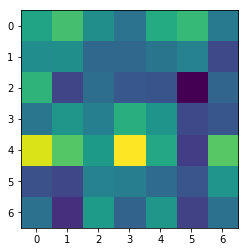

In [0]:
generator = make_generator_model()

noise = tf.random.normal([1, 100])
generated_image = generator(noise, training=False)

plt.imshow(generated_image[0, :, :, 0])

### The Discriminator

The discriminator is a CNN-based image classifier.

In [0]:
# Create a discriminator to police the generator (notice the input shape of the first Conv2D layer)

def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(32, (5, 5), strides=(2, 2), padding='same',
                                     input_shape=[7, 7, 1]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1))

    return model

Use the (as yet untrained) discriminator to classify the generated images as real or fake. The model will be trained to output positive values for real images, and negative values for fake images.

In [0]:
discriminator = make_discriminator_model()
decision = discriminator(generated_image)
print (decision)

tf.Tensor([[-0.00597883]], shape=(1, 1), dtype=float32)


## Define the loss and optimizers

Define loss functions and optimizers for both models.


In [0]:
# This method returns a helper function to compute cross entropy loss
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

### Discriminator loss

This method quantifies how well the discriminator is able to distinguish real images from fakes. It compares the discriminator's predictions on real images to an array of 1s, and the discriminator's predictions on fake (generated) images to an array of 0s.

In [0]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

### Generator loss
The generator's loss quantifies how well it was able to trick the discriminator. Intuitively, if the generator is performing well, the discriminator will classify the fake images as real (or 1). Here, we will compare the discriminators decisions on the generated images to an array of 1s.

In [0]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

The discriminator and the generator optimizers are different since we will train two networks separately.

In [0]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

### Save checkpoints
This notebook also demonstrates how to save and restore models, which can be helpful in case a long running training task is interrupted.

In [0]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

## Define the training loop



In [0]:
EPOCHS = 50
noise_dim = 100
num_examples_to_generate = 16

# We will reuse this seed overtime (so it's easier)
# to visualize progress in the animated GIF)
seed = tf.random.normal([num_examples_to_generate, noise_dim])

The training loop begins with generator receiving a random seed as input. That seed is used to produce an image. The discriminator is then used to classify real images (drawn from the training set) and fakes images (produced by the generator). The loss is calculated for each of these models, and the gradients are used to update the generator and discriminator.

In [0]:
# Notice the use of `tf.function`
# This annotation causes the function to be "compiled".
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      generated_images = generator(noise, training=True)

      real_output = discriminator(images, training=True)
      fake_output = discriminator(generated_images, training=True)

      gen_loss = generator_loss(fake_output)
      disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

In [0]:
def train(dataset, epochs):
  for epoch in range(epochs):
    start = time.time()

    for image_batch in dataset:
      train_step(image_batch)

    # Produce images for the GIF as we go
    display.clear_output(wait=True)
    generate_and_save_images(generator,
                             epoch + 1,
                             seed)

    # Save the model every 15 epochs
    if (epoch + 1) % 15 == 0:
      checkpoint.save(file_prefix = checkpoint_prefix)

    print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))

  # Generate after the final epoch
  display.clear_output(wait=True)
  generate_and_save_images(generator,
                           epochs,
                           seed)

**Generate and save images**



In [0]:
def generate_and_save_images(model, epoch, test_input):
  # Notice `training` is set to False.
  # This is so all layers run in inference mode (batchnorm).
  predictions = model(test_input, training=False)
  print('prediction shape = ', predictions.shape)

  fig = plt.figure(figsize=(4,4))

  for i in range(predictions.shape[0]):
      plt.subplot(4, 4, i+1)
      #plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
      plt.imshow(predictions[i, :, :, 0])
      plt.axis('off')

  #plt.imshow(predictions[0, :, :, 0])
  plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()

## Train the model
Call the `train()` method defined above to train the generator and discriminator simultaneously. Note, training GANs can be tricky. It's important that the generator and discriminator do not overpower each other (e.g., that they train at a similar rate).

At the beginning of the training, the generated image tiles will look like random noise. As training progresses, the tiles will look increasingly real This is the expectation when enough training data i.e. images, is provided. Usually with only a few images as input, the discriminator doesn't get the oppooertunity to police the generator properly.

prediction shape =  (16, 7, 7, 1)
CPU times: user 2min 15s, sys: 18 s, total: 2min 33s
Wall time: 7min 39s


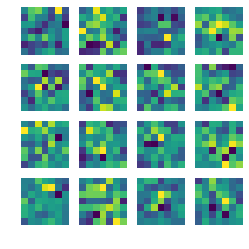

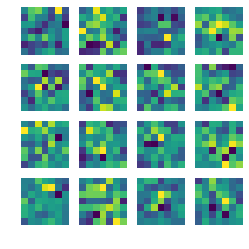

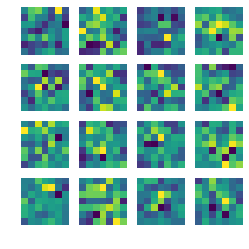

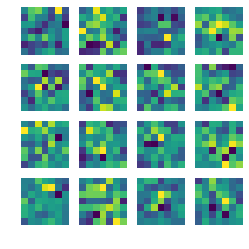

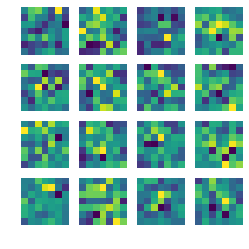

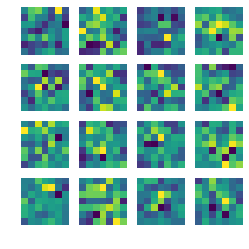

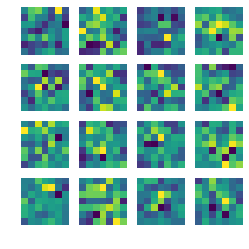

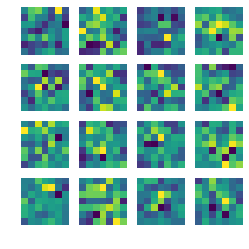

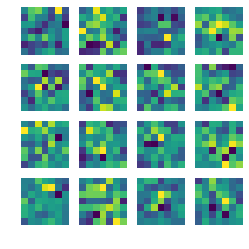

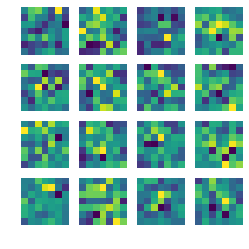

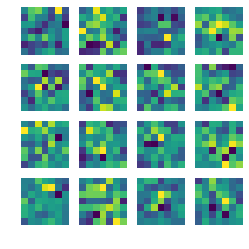

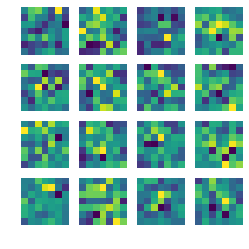

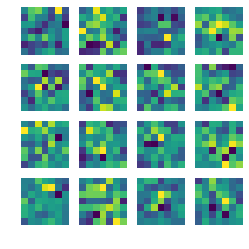

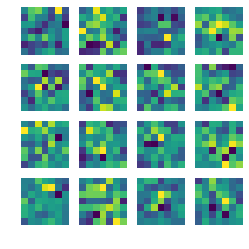

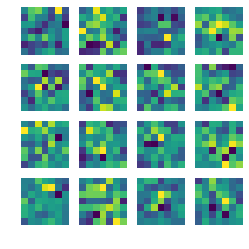

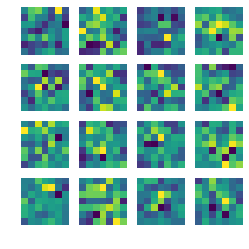

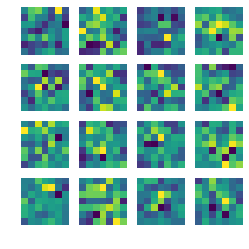

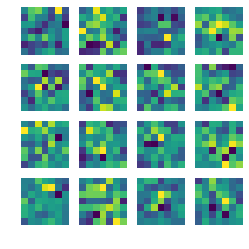

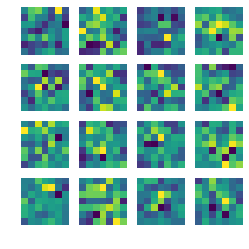

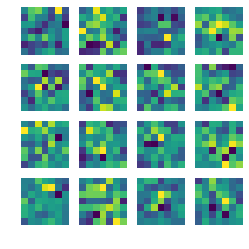

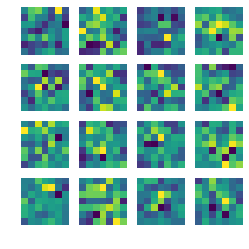

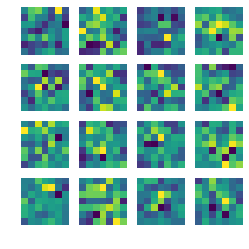

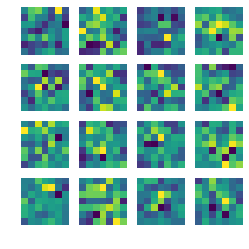

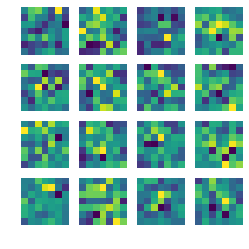

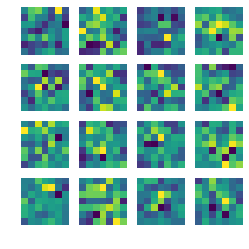

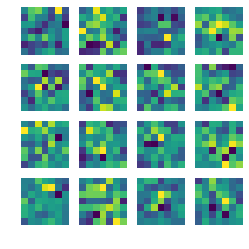

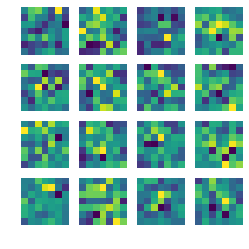

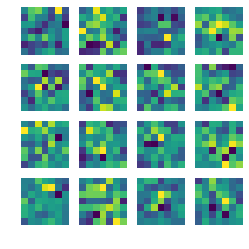

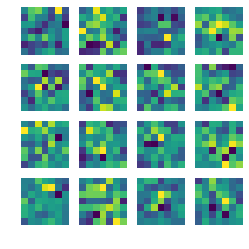

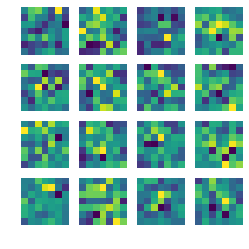

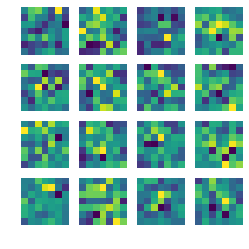

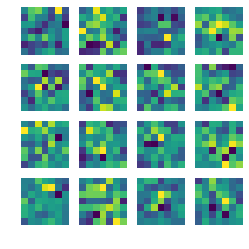

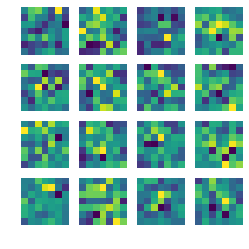

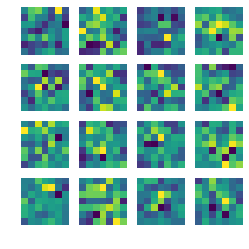

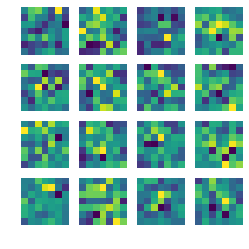

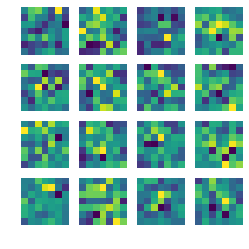

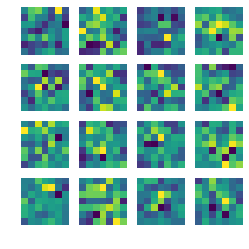

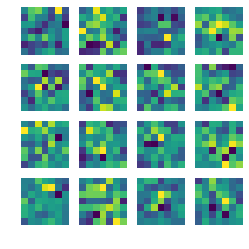

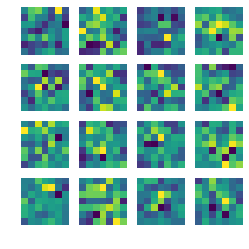

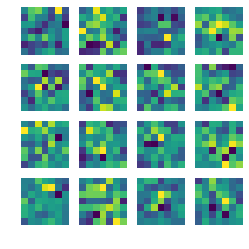

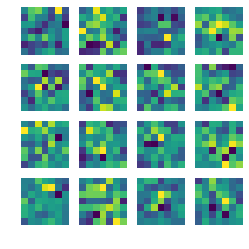

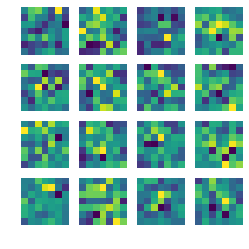

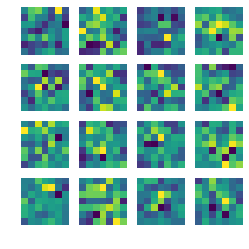

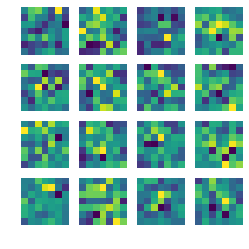

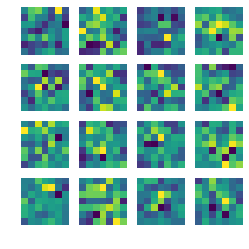

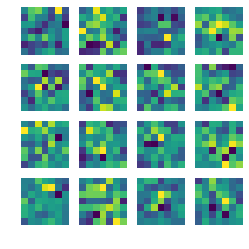

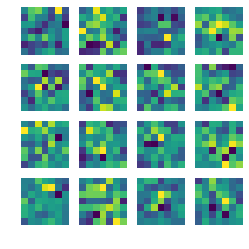

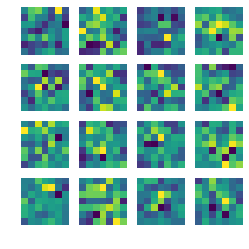

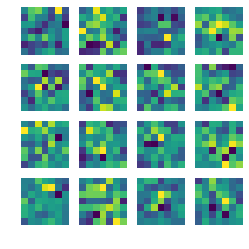

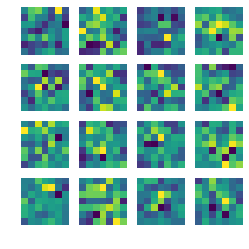

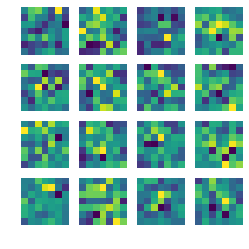

In [0]:
%%time
train(train_dataset, EPOCHS)

Restore the latest checkpoint.

In [0]:
checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))

## Create a GIF


In [0]:
# Display a single image using the epoch number
def display_image(epoch_no):
  return PIL.Image.open('image_at_epoch_{:04d}.png'.format(epoch_no))

In [0]:
display_image(EPOCHS)

Use `imageio` to create an animated gif using the images saved during training.

In [0]:
anim_file = 'dcgan.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
  filenames = glob.glob('image*.png')
  filenames = sorted(filenames)
  last = -1
  for i,filename in enumerate(filenames):
    frame = 2*(i**0.5)
    if round(frame) > round(last):
      last = frame
    else:
      continue
    image = imageio.imread(filename)
    writer.append_data(image)
  image = imageio.imread(filename)
  writer.append_data(image)

import IPython
if IPython.version_info > (6,2,0,''):
  display.Image(filename=anim_file)

If you're working in Colab you can download the animation with the code below:

In [0]:
try:
  from google.colab import files
except ImportError:
   pass
else:
  files.download(anim_file)



---



---



---



---



---



---



---



---



---



---



# **Proof of Concept #2**

# **Cleaning up noisy/missing data from NASA datasets**

# **# Algorithm: Denoising Autoencoder**

In [0]:
!pwd

/content


In [0]:
cd Colab\ Notebooks

/content/drive/My Drive/Colab Notebooks


In [0]:
!ls

 28x28-nasa-earth-images_bad    dcgan_tutorial_nasa.ipynb
 28x28-nasa-earth-images_good   DEDOMENA.ipynb
 56x56-nasa-earth-bad-images    DEDOMENA_SHAMIR.ipynb
 56x56-nasa-earth-images        Denoising_autoencoders.ipynb
 Bulk			        Denoising_autoencoders_NASA_earth_data.ipynb
'Copy of Copy of dcgan.ipynb'   nasa_modis_image_2019-03-016_lowres5.jpg


In [0]:
# mount google drive location where you saved a .zip archive of your folder that contains images; then unzip the file

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# get RGB images from Google drive and store them as numpy array

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import glob
import math
import cv2

#filelist = glob.glob('Bulk/*.jpg')
#good_im = np.array([np.array(Image.open(fname).convert('LA')) for fname in filelist])   # Already converts to grayscale but has an extra dummy layer



In [0]:
# Convert images to grayscale and store them in an array
filelist = glob.glob('Bulk/*.jpg')
data = []
for file in filelist:
    img = cv2.imread(file)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    data.append(img_gray)

In [0]:
np.shape(data)

(2073, 28, 28)

In [0]:
data_array = np.array(data)
data_array.shape, type(data_array)

((2073, 28, 28), numpy.ndarray)

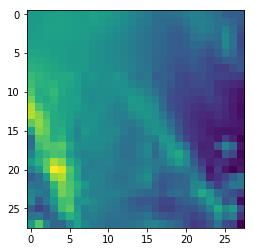

In [0]:
plt.imshow(data_array[56,:,:])

In [0]:
# split the batch into training and test set: 80-20 partition

batch_size = len(data_array[:,0,0])
train_size = int(math.ceil(batch_size*0.8))
test_size = batch_size - train_size

x_train = data_array[0:train_size,:,:]
x_test = data_array[train_size:,:,:]


In [0]:
train_size, test_size

(1659, 414)

In [0]:
x_train.shape, x_test.shape

((1659, 28, 28), (414, 28, 28))

('x_train shape:', (1659, 28, 28))
(1659, 'train samples')
(414, 'test samples')


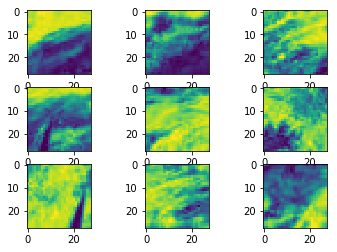

In [0]:
%matplotlib inline

import keras
#from keras.datasets import cifar10
#from keras.datasets import mnist

from matplotlib import pyplot
from matplotlib.pyplot import imshow
import numpy as np


# https://keras.io/datasets/#mnist-database-of-handwritten-digits
# load mnist in a grayscale format bunch of images
#(x_train, y_train), (x_test, y_test) = mnist.load_data()

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

for i in range(0, 9):
    pyplot.subplot(330 + 1 + i)
    imshow(x_train[i])
    imgplot = pyplot.imshow(x_train[i])

training set shape is (1659, 28, 28)
First image in the training set


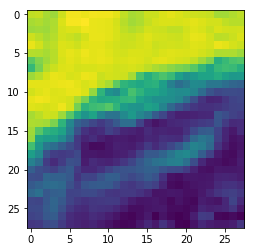

In [0]:
print "training set shape is", x_train.shape
#print y_train.shape

# since we deal with square images
image_size = x_train.shape[1]

# inspect the format of x and y
print "First image in the training set"
pyplot.imshow(x_train[0])

In [0]:
initial_seed = 1234
np.random.seed(initial_seed)

In [0]:
print np.amax(x_train)
# normalize the pixel values to have everything between 0 and 1
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

255


In [0]:
# https://github.com/keras-team/keras/blob/master/examples/mnist_denoising_autoencoder.py
# https://blog.keras.io/building-autoencoders-in-keras.html
# x_train_ = np.reshape(x_train, [-1, image_size, image_size, 1])
x_train_ = np.reshape(x_train, (len(x_train), image_size, image_size, 1))
print "Reshaped train from", x_train.shape, "to", x_train_.shape

#x_test_ = np.reshape(x_test, [-1, image_size, image_size, 1])
x_test_ = np.reshape(x_test, (len(x_test), image_size, image_size, 1))
print "Reshaped test from", x_test.shape, "to", x_test_.shape

Reshaped train from (1659, 28, 28) to (1659, 28, 28, 1)
Reshaped test from (414, 28, 28) to (414, 28, 28, 1)


In [0]:
# Generate corrupted MNIST images by adding noise with normal dist
# centered at 0.5 and std=0.5
noise = np.random.normal(loc=0.5,
                         scale=0.5,
                         size=x_train_.shape)
print "x_train noise.shape", noise.shape
x_train_noisy = x_train_ + noise
noise = np.random.normal(loc=0.5,
                         scale=0.5,
                         size=x_test_.shape)
x_test_noisy = x_test_ + noise
print "x_test noise.shape", noise.shape

# make sure the data are in the [0,1] range by clipping lower and higher ones
# https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.clip.html
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

x_train noise.shape (1659, 28, 28, 1)
x_test noise.shape (414, 28, 28, 1)


Let's see how noisy became the first training entry after adding the noise:

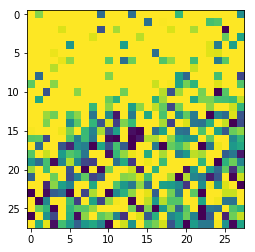

In [0]:
pyplot.imshow(
    np.reshape(x_train_noisy[0], (1, image_size, image_size))[0]
)

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD, rmsprop
from keras.layers.convolutional import Conv2D, MaxPooling2D, UpSampling2D

model = Sequential()
model.add(Conv2D(16, (3, 3), 
                 input_shape=x_train_.shape[1:], # (28, 28)
                 activation='relu',
                 padding='same'))
model.add(MaxPooling2D((2, 2), padding="same"))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding="same"))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding="same"))

# ** encoded representation **
# at this point the representation is (4, 4, 8) i.e. 128-dimensional

model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(1, (3, 3), activation='sigmoid', padding='same'))
          
model.compile(optimizer='adadelta', loss='binary_crossentropy')

W1020 19:09:57.593410 140400888121216 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1020 19:09:57.604981 140400888121216 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1020 19:09:57.615333 140400888121216 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1020 19:09:57.662156 140400888121216 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W1020 19:09:57.707104 140400888121216 module_wrapper.py:139] From /usr/loca

In [0]:
model.fit(x_train_noisy, 
          x_train_,
          epochs=250,
          batch_size=128,
          shuffle=True,
          validation_data=(x_test_noisy, x_test_))

Train on 1659 samples, validate on 414 samples
Epoch 1/250
1659/1659 [==============================] - 2s 1ms/step - loss: 0.6399 - val_loss: 0.6594
Epoch 2/250
1659/1659 [==============================] - 2s 1ms/step - loss: 0.6438 - val_loss: 0.6752
Epoch 3/250
1659/1659 [==============================] - 2s 1ms/step - loss: 0.6429 - val_loss: 0.6310
Epoch 4/250
1659/1659 [==============================] - 2s 2ms/step - loss: 0.6490 - val_loss: 0.6695
Epoch 5/250
1659/1659 [==============================] - 2s 1ms/step - loss: 0.6558 - val_loss: 0.6406
Epoch 6/250
1659/1659 [==============================] - 2s 1ms/step - loss: 0.6477 - val_loss: 0.6716
Epoch 7/250
1659/1659 [==============================] - 2s 1ms/step - loss: 0.6398 - val_loss: 0.6397
Epoch 8/250
1659/1659 [==============================] - 2s 1ms/step - loss: 0.6358 - val_loss: 0.6337
Epoch 9/250
1659/1659 [==============================] - 2s 1ms/step - loss: 0.6713 - val_loss: 0.6310
Epoch 10/250
1659/1659 [==

/usr/local/lib/python2.7/dist-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.302240). Check your callbacks.
  % delta_t_median)


1659/1659 [==============================] - 3s 2ms/step - loss: 0.6795 - val_loss: 0.6597
Epoch 48/250
1659/1659 [==============================] - 2s 1ms/step - loss: 0.6663 - val_loss: 0.6633
Epoch 49/250
1659/1659 [==============================] - 3s 2ms/step - loss: 0.6376 - val_loss: 0.6420
Epoch 50/250
1659/1659 [==============================] - 3s 2ms/step - loss: 0.6319 - val_loss: 0.6545
Epoch 51/250
1659/1659 [==============================] - 2s 1ms/step - loss: 0.6355 - val_loss: 0.6330
Epoch 52/250
1659/1659 [==============================] - 2s 1ms/step - loss: 0.6322 - val_loss: 0.6338
Epoch 53/250
1659/1659 [==============================] - 2s 1ms/step - loss: 0.6457 - val_loss: 0.6325
Epoch 54/250
1659/1659 [==============================] - 3s 2ms/step - loss: 0.6358 - val_loss: 0.6345
Epoch 55/250
1659/1659 [==============================] - 2s 1ms/step - loss: 0.6329 - val_loss: 0.6708
Epoch 56/250
1659/1659 [==============================] - 3s 2ms/step - loss:

In [0]:
# example prediction on the corrupted test images
decoded = model.predict(
    # only predict the first element as example
    np.reshape(x_test_noisy[0], (1, image_size, image_size, 1))
)

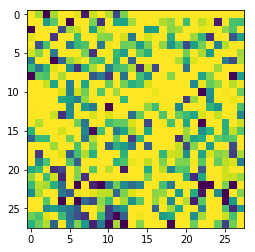

In [0]:
pyplot.imshow(
    np.reshape(x_test_noisy[0], (1, image_size, image_size))[0]
)

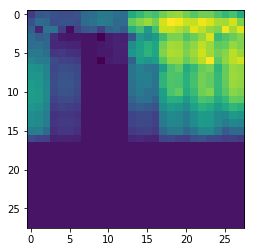

In [0]:
pyplot.imshow(
    np.reshape(decoded, (1, image_size, image_size))[0]
)